
# Mixed Orientation

Using multiple Arrays in a single PVSystem.


Residential and Commercial systems often have fixed-tilt arrays
installed at different azimuths.  This can be modeled by using
multiple :py:class:`~pvlib.pvsystem.Array` objects (one for each
orientation) with a single :py:class:`~pvlib.pvsystem.PVSystem` object.

This particular example has one east-facing array (azimuth=90) and one
west-facing array (azimuth=270), which aside from orientation are identical.



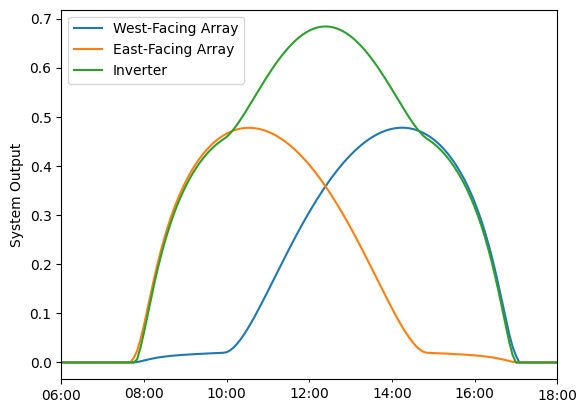

In [14]:
from pvlib import pvsystem, modelchain, location
import pandas as pd
import matplotlib.pyplot as plt

array_kwargs = dict(
    module_parameters=dict(pdc0=1, gamma_pdc=-0.004),
    temperature_model_parameters=dict(a=-3.56, b=-0.075, deltaT=3)
)

arrays = [
    pvsystem.Array(pvsystem.FixedMount(30, 270), name='West-Facing Array',
                   **array_kwargs),
    pvsystem.Array(pvsystem.FixedMount(30, 90), name='East-Facing Array',
                   **array_kwargs),
]
loc = location.Location(40, -80)
system = pvsystem.PVSystem(arrays=arrays, inverter_parameters=dict(pdc0=3))
mc = modelchain.ModelChain(system, loc, aoi_model='physical',
                           spectral_model='no_loss')

times = pd.date_range('2019-01-01 06:00', '2019-01-01 18:00', freq='5min',
                      tz='Etc/GMT+5')
weather = loc.get_clearsky(times)
mc.run_model(weather)

fig, ax = plt.subplots()
for array, pdc in zip(system.arrays, mc.results.dc):
    pdc.plot(label=f'{array.name}')
mc.results.ac.plot(label='Inverter')
plt.ylabel('System Output')
plt.legend()
plt.show()

## Debugging

In [12]:
print(type(mc.results.ac))

<class 'pandas.core.series.Series'>


In [4]:
print(system.arrays)

(Array:
  name: West-Facing Array
  mount: FixedMount(surface_tilt=30, surface_azimuth=270, racking_model=None, module_height=None)
  module: None
  albedo: 0.25
  module_type: None
  temperature_model_parameters: {'a': -3.56, 'b': -0.075, 'deltaT': 3}
  strings: 1
  modules_per_string: 1, Array:
  name: East-Facing Array
  mount: FixedMount(surface_tilt=30, surface_azimuth=90, racking_model=None, module_height=None)
  module: None
  albedo: 0.25
  module_type: None
  temperature_model_parameters: {'a': -3.56, 'b': -0.075, 'deltaT': 3}
  strings: 1
  modules_per_string: 1)


In [23]:
print(mc.results.cell_temperature[1].max())

36.34602634912578
